## Introduction

This data comes from FiveThirtyEight using their RAPTOR Metric. No, this isn't just for the Toronto Raptors. It's a metric they created to better reflects the style of the modern NBA and the performance of its players. It standard for Robust Algorithm (using) Player Tracking (and) On/Off Ratings. It also has WAR (Wins Above Replacement Data). That's more up my ally as a baseball fan.
\
\
Full Info:
\
https://fivethirtyeight.com/features/introducing-raptor-our-new-metric-for-the-modern-nba/

## Questions
- Who is the best player since 1974 (when the data starts)?
- How did their defensive and offensive abilities contribute to their overall scores?
- Do today's biggest stars value defense and offense in the same fashion as the all-time greats?

## 1.0 Imports

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2.0 Load Data

In [283]:
nba = pd.read_csv('nba-raptor/historical_RAPTOR_by_player.csv')

In [284]:
nba.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


In [285]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19159 entries, 0 to 19158
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       19159 non-null  object 
 1   player_id         19159 non-null  object 
 2   season            19159 non-null  int64  
 3   poss              19159 non-null  int64  
 4   mp                19159 non-null  int64  
 5   raptor_offense    19159 non-null  float64
 6   raptor_defense    19159 non-null  float64
 7   raptor_total      19159 non-null  float64
 8   war_total         19159 non-null  float64
 9   war_reg_season    19159 non-null  float64
 10  war_playoffs      19159 non-null  float64
 11  predator_offense  19159 non-null  float64
 12  predator_defense  19159 non-null  float64
 13  predator_total    19159 non-null  float64
 14  pace_impact       19158 non-null  float64
dtypes: float64(10), int64(3), object(2)
memory usage: 2.2+ MB


In [286]:
nba.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19158.000000
mean,2001.911686,2753.459836,1363.018477,-1.282572,-0.336641,-1.619213,1.980890,1.791916,0.188974,-1.285501,-0.533616,-1.819117,0.196519
std,12.991213,2032.700765,1003.793897,3.502971,2.467030,4.525422,3.458863,3.074403,0.589576,3.218998,2.305877,4.435724,0.827142
min,1977.000000,1.000000,0.000000,-82.192072,-56.982520,-103.084801,-7.382978,-7.382978,-1.376520,-71.510086,-37.871745,-101.442650,-7.191955
25%,1991.000000,883.000000,440.000000,-2.828729,-1.412329,-3.574572,-0.114100,-0.114928,0.000000,-2.860883,-1.631094,-3.989563,-0.241770
50%,2003.000000,2549.000000,1262.000000,-1.112462,-0.406899,-1.365128,0.586046,0.556030,0.000000,-1.191378,-0.532853,-1.628693,0.093278
75%,2013.000000,4345.500000,2144.500000,0.547465,0.707465,0.747604,3.106047,2.901287,0.072959,0.468142,0.628289,0.691144,0.517431
max,2022.000000,9271.000000,4270.000000,53.228864,62.469205,72.622361,28.762877,24.355978,7.006934,42.890281,42.989063,49.106166,23.732063


## 3.0 Visualize

### 3.1 Who is the best player since 1974?

Using both RAPTOR and WAR, let's explore who is the GOAT (since 1974 lol).

In [287]:
#Create a goupby dataframe, summing up career WAR and RAPTOR.
car_totals = nba.groupby('player_name')[['raptor_offense','raptor_defense','raptor_total','war_total','war_reg_season','war_playoffs']].agg([np.sum])

#create a groupby dataframe, counting unique seasons
sea_count = pd.DataFrame(nba.groupby('player_name')[['season']].nunique())

#merge dataframes
#group_nba = pd.merge(car_totals, sea_count, on='player_name', how='inner', suffixes=('_x', '_y'))

nba_group = car_totals.join(pd.concat([sea_count], axis=1, keys=['seasons']))

In [288]:
nba_group = nba_group.droplevel(1, axis=1)

In [289]:
nba_group.head()

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
player_name,,,,,,,
A.C. Green,-4.705119,3.341092,-1.364027,60.159018,53.723918,6.435101,16
A.J. Bramlett,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,1
A.J. English,-3.671165,-5.108166,-8.779331,-2.597820,-2.597820,0.000000,2
A.J. Guyton,-12.421668,-4.302077,-16.723745,-0.232653,-0.232653,0.000000,3
A.J. Wynder,-5.176970,-3.230910,-8.407881,-0.111936,-0.111936,0.000000,1


In [290]:
#save top 10 war and raport
war_10 = nba_group.sort_values(by='war_total', ascending=False).head(10).reset_index(drop=False)
raptor_10 = nba_group.sort_values(by='raptor_total', ascending=False).head(10).reset_index(drop=False)

In [291]:
raptor_10

,player_name,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
0,John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19
1,LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19
2,Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17
3,Michael Jordan,86.743440,31.115867,117.859307,280.362177,232.680810,47.681367,15
4,David Robinson,26.238601,70.045005,96.283606,194.286908,174.714298,19.572610,14
5,Tim Duncan,24.833909,71.421209,96.255118,229.963657,188.762095,41.201562,19
6,Magic Johnson,85.865812,10.011557,95.877369,216.450374,173.275305,43.175069,13
7,Kevin Garnett,23.608922,68.621065,92.229988,216.866618,196.652307,20.214312,21
8,Manu Ginobili,62.179984,29.347662,91.527646,151.868894,122.523334,29.345561,16
9,Charles Barkley,76.418684,14.262592,90.681276,199.092359,175.253412,23.838946,16


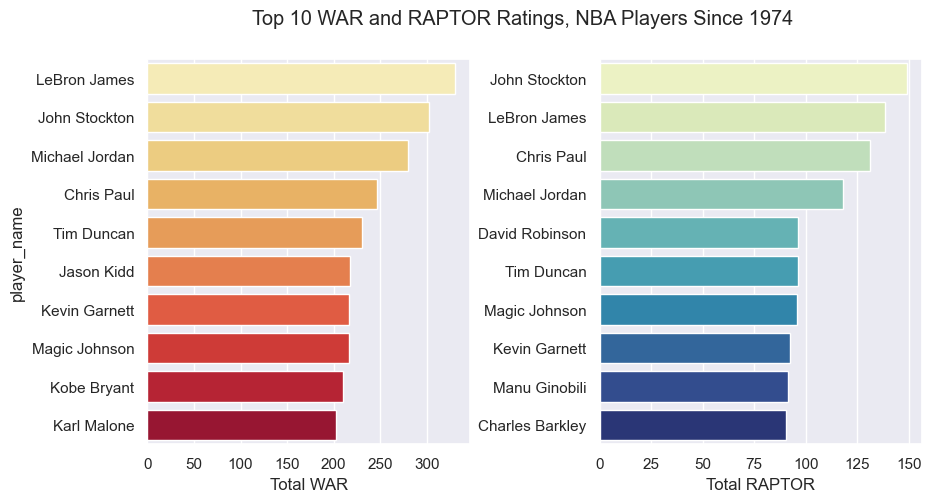

In [336]:
#visualize top 10 raptor and war
fig, ax = plt.subplots(1,2, sharey=False)


fig.set_size_inches(10, 5, forward=True)# set graph size

sns.barplot(ax=ax[0], x='war_total', y='player_name', data=war_10, palette='YlOrRd')
sns.barplot(ax=ax[1], x='raptor_total', y='player_name', data=raptor_10, palette='YlGnBu')

ax[1].set_ylabel(None) #remove repetitive y_label on second graph
ax[0].set_xlabel('Total WAR')
ax[1].set_xlabel('Total RAPTOR')

fig.suptitle('Top 10 WAR and RAPTOR Ratings, NBA Players Since 1974') #set overall title
plt.subplots_adjust(wspace=0.4) #create space for labels between graphs
plt.show()

**Observations:**
\
Some interesting results here. The standard debate is MJ vs. Lebron. But the RAPTOR model really tries to reflect the style of <u>today's</u> NBA. There is also the factor that these players didn't all play the same number of years. Ignoring the value of longevity, let's see who is tops in metrics per season.

In [293]:
#Calculate metrics per season for this same subset of players
war_10['per_season'] = war_10['war_total'] / war_10['seasons']
raptor_10['per_season'] = raptor_10['raptor_total'] / raptor_10['seasons']

In [294]:
raptor_10.head(3)

,player_name,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons,per_season
0,John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19,7.850924
1,LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19,7.280608
2,Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17,7.724197


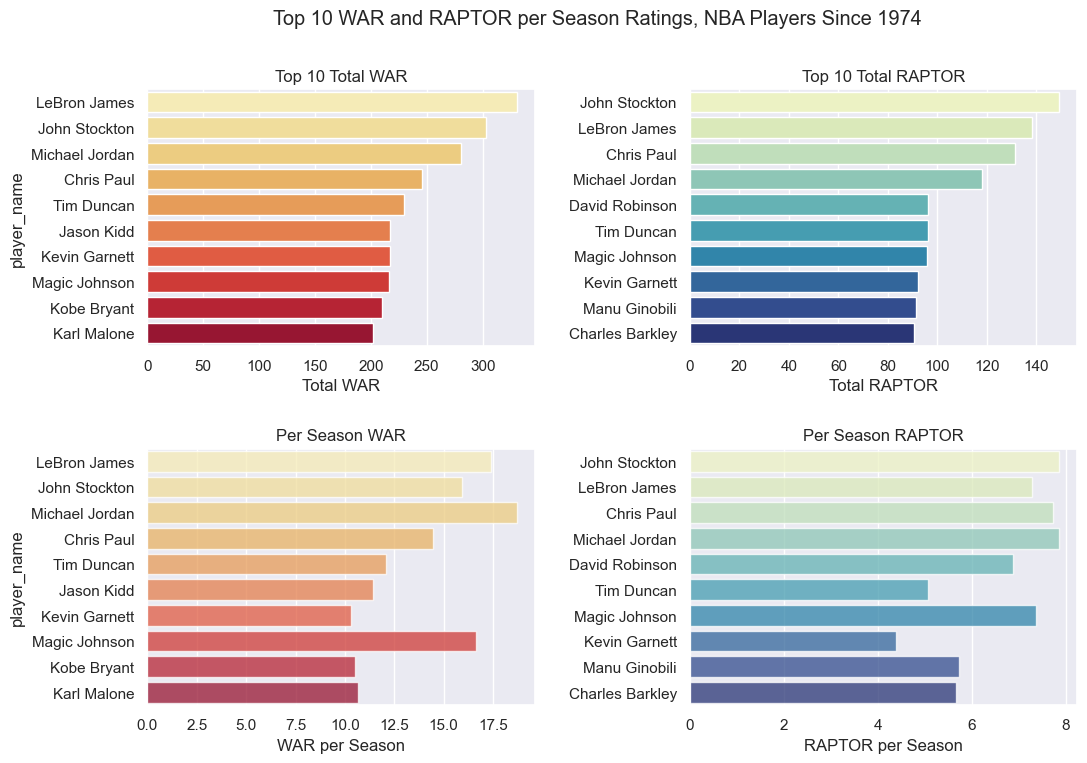

In [295]:
#visualize top 10 raptor and war
fig, ax = plt.subplots(2,2, sharey=False)


fig.set_size_inches(12, 8, forward=True)# set graph size

sns.barplot(ax=ax[0,0], x='war_total', y='player_name', data=war_10, palette='YlOrRd')
sns.barplot(ax=ax[0,1], x='raptor_total', y='player_name', data=raptor_10, palette='YlGnBu')
sns.barplot(ax=ax[1,0], x='per_season', y='player_name', data=war_10, palette='YlOrRd', alpha=0.75)
sns.barplot(ax=ax[1,1], x='per_season', y='player_name', data=raptor_10, palette='YlGnBu', alpha=0.75)

ax[0,1].set_ylabel('') #remove repetitive y_label on second graph
ax[1,1].set_ylabel('') #remove repetitive y_label on second graph
ax[0,0].set_xlabel('Total WAR')
ax[0,1].set_xlabel('Total RAPTOR')
ax[1,0].set_xlabel('WAR per Season')
ax[1,1].set_xlabel('RAPTOR per Season')
ax[0,0].set_title('Top 10 Total WAR')
ax[0,1].set_title('Top 10 Total RAPTOR')
ax[1,0].set_title('Per Season WAR')
ax[1,1].set_title('Per Season RAPTOR')

fig.suptitle('Top 10 WAR and RAPTOR per Season Ratings, NBA Players Since 1974') #set overall title
plt.subplots_adjust(wspace=0.4, hspace=0.4) #create space for labels between graphs
plt.show()

That now puts MJ at the top of both if we go on a per season basis. Let's now look at all the players offenseive and defensive raptor, highlighting the top 10 total. We'll use RAPTOR because it's a fun alternative stat and I like 538.

### 3.1.1 All Players

We'll start by add the per-season calculation and flagging the top 10 in the df.

In [296]:
nba_group.head(3)

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
player_name,,,,,,,
A.C. Green,-4.705119,3.341092,-1.364027,60.159018,53.723918,6.435101,16
A.J. Bramlett,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,1
A.J. English,-3.671165,-5.108166,-8.779331,-2.597820,-2.597820,0.000000,2


In [297]:
#create a per season amount
nba_group['raptor_per_season'] = nba_group['raptor_total'] / nba_group['seasons']

In [298]:
#create a ranking column and top 10 flag
nba_group['raptor_rank'] = nba_group['raptor_total'].rank(ascending=False)

#flag the top-10
nba_group['raptor_top_10'] = nba_group['raptor_rank'] <= 10

In [299]:
nba_group.sort_values(by='raptor_total',ascending=False).head(12)

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons,raptor_per_season,raptor_rank,raptor_top_10
player_name,,,,,,,,,,
John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19,7.850924,1.0,True
LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19,7.280608,2.0,True
Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17,7.724197,3.0,True
Michael Jordan,86.743440,31.115867,117.859307,280.362177,232.680810,47.681367,15,7.857287,4.0,True
David Robinson,26.238601,70.045005,96.283606,194.286908,174.714298,19.572610,14,6.877400,5.0,True
Tim Duncan,24.833909,71.421209,96.255118,229.963657,188.762095,41.201562,19,5.066059,6.0,True
Magic Johnson,85.865812,10.011557,95.877369,216.450374,173.275305,43.175069,13,7.375182,7.0,True
Kevin Garnett,23.608922,68.621065,92.229988,216.866618,196.652307,20.214312,21,4.391904,8.0,True
Manu Ginobili,62.179984,29.347662,91.527646,151.868894,122.523334,29.345561,16,5.720478,9.0,True


In [300]:
sns.set()

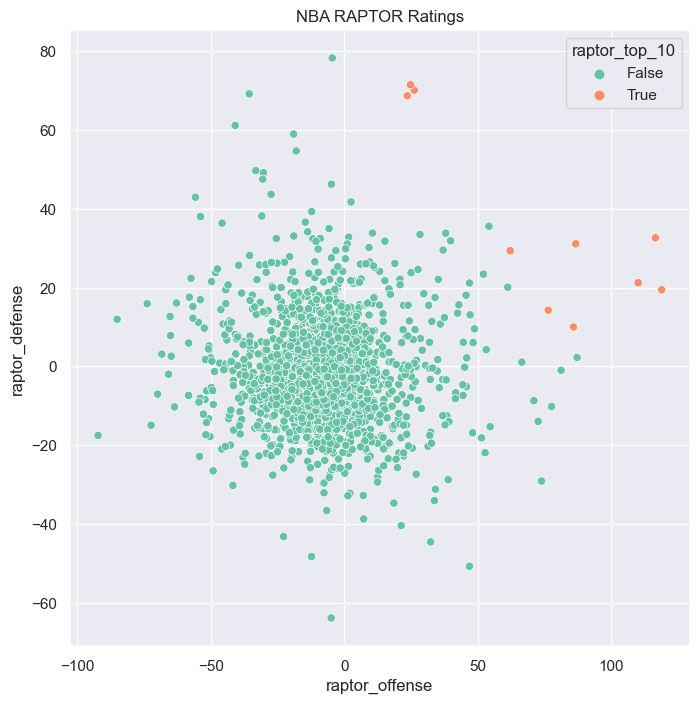

In [301]:
#Create a scatter plot
plt.figure(figsize=(8,8))

sns.scatterplot(x='raptor_offense', y='raptor_defense', data=nba_group, hue='raptor_top_10', palette='Set2')
plt.title('NBA RAPTOR Ratings')
plt.show()

There are more in the top 10 that are outliers in terms of better total offense, but there are 3 that are clustered based on their defensive scores. Looking at our dataframe, those are David Robinson, Kevin Garnett, and Tim Duncan - 3 big men that were great on both ends of the floor but their RAPTOR value is coming more from their defense.

### 3.1.2 Offensive vs. Defensive Value

Let's see how these greatness of these top 10 players is composed between offense and defense.

In [302]:
#calculate offense and defensive split
raptor_10['off_perc'] = raptor_10['raptor_offense'] / raptor_10['raptor_total']
raptor_10['def_perc'] = raptor_10['raptor_defense'] / raptor_10['raptor_total']

In [303]:
raptor_10.head()

,player_name,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons,per_season,off_perc,def_perc
0,John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19,7.850924,0.781368,0.218632
1,LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19,7.280608,0.859602,0.140398
2,Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17,7.724197,0.838382,0.161618
3,Michael Jordan,86.743440,31.115867,117.859307,280.362177,232.680810,47.681367,15,7.857287,0.735991,0.264009
4,David Robinson,26.238601,70.045005,96.283606,194.286908,174.714298,19.572610,14,6.877400,0.272514,0.727486


<Figure size 1200x1200 with 0 Axes>

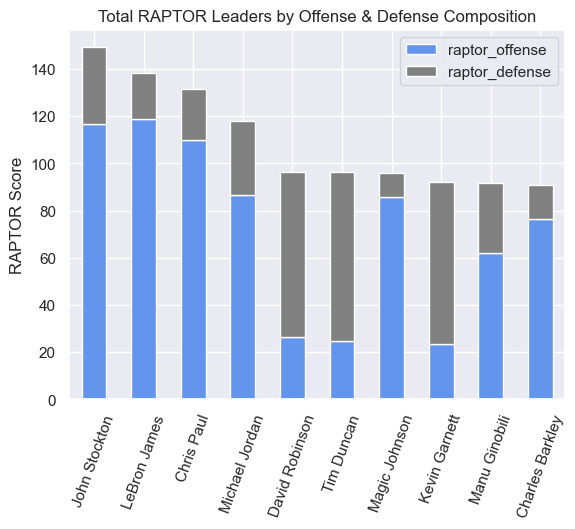

In [304]:
sns.set(style='darkgrid')

plt.figure(figsize=(12,12))

raptor_10[['player_name','raptor_offense','raptor_defense']].set_index('player_name').plot(kind='bar', stacked=True, color=['cornflowerblue','grey'])

plt.title('Total RAPTOR Leaders by Offense & Defense Composition')
plt.ylabel('RAPTOR Score')
plt.xticks(rotation=70)
plt.xlabel(None)

plt.show()

RAPTOR gives us a way to shift the conversation from "greatest of all time" to which players brought the most value to there team. We know MJ on a per season basis gives us the most value, but there is also value in longevity. LeBron will likely pass John Stockton in these total rankings soon. 
\
\
But since this is a system that is meant to reflect the current NBA, let's look to see how this composition looks for the leaders of today's game.

## 3.2 Historical vs. Modern

The "modern" dataset starts in 2014. Let's see the best of the best since then.

In [305]:
modern = pd.read_csv('nba-raptor/modern_RAPTOR_by_player.csv')

modern.head(3)

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013


In [306]:
modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           4685 non-null   object 
 1   player_id             4685 non-null   object 
 2   season                4685 non-null   int64  
 3   poss                  4685 non-null   int64  
 4   mp                    4685 non-null   int64  
 5   raptor_box_offense    4684 non-null   float64
 6   raptor_box_defense    4684 non-null   float64
 7   raptor_box_total      4684 non-null   float64
 8   raptor_onoff_offense  4684 non-null   float64
 9   raptor_onoff_defense  4684 non-null   float64
 10  raptor_onoff_total    4684 non-null   float64
 11  raptor_offense        4685 non-null   float64
 12  raptor_defense        4685 non-null   float64
 13  raptor_total          4685 non-null   float64
 14  war_total             4685 non-null   float64
 15  war_reg_season       

In [307]:
#Create a goupby dataframe, summing up career WAR and RAPTOR. This time we won't count the seasons since we won't visualize it.
mod_totals = modern.groupby('player_name')[['raptor_offense','raptor_defense','raptor_total','poss']].agg([np.sum]).droplevel(1, axis=1)

In [308]:
mod_totals.head()

,raptor_offense,raptor_defense,raptor_total,poss
player_name,,,,
AJ Hammons,-6.225790,-2.753312,-8.979102,329
AJ Price,-3.779609,1.839397,-1.940212,839
Aaron Brooks,-0.740019,-13.131299,-13.871318,11673
Aaron Gordon,0.533716,1.257631,1.791347,32785
Aaron Gray,-3.376562,0.747394,-2.629168,721


In [311]:
#This modern dataset has full possesion data and some players with low # of possesions so let's filter down to only players with 1000 possesions

mod_totals = mod_totals[mod_totals['poss'] >= 1000]

In [312]:
#filter down to the top 10 since 2014
modern_10 = mod_totals.sort_values(by='raptor_total', ascending=False).head(10).reset_index(drop=False)

modern_10

,player_name,raptor_offense,raptor_defense,raptor_total,poss
0,Stephen Curry,72.999549,1.905560,74.905109,50405
1,James Harden,64.659892,0.156589,64.816481,56840
2,Chris Paul,56.517454,7.876088,64.393541,47532
3,Kawhi Leonard,36.808632,27.394573,64.203205,36874
4,Nikola Jokic,42.945199,15.639235,58.584434,36272
5,LeBron James,53.627091,2.962543,56.589634,54213
6,Paul George,25.952200,25.882120,51.834320,43926
7,Jimmy Butler,33.065149,16.107619,49.172768,47086
8,Kevin Durant,45.353005,1.608139,46.961144,43662
9,Anthony Davis,15.039472,30.862956,45.902428,42133


### 3.2.1 Visualize Comparing The Composition of Top 10s in Total vs. Modern

In [324]:
#create the subsetting dfs
historical_df = raptor_10[['player_name','raptor_offense','raptor_defense']].set_index('player_name')
modern_df = modern_10[['player_name','raptor_offense','raptor_defense']].set_index('player_name')

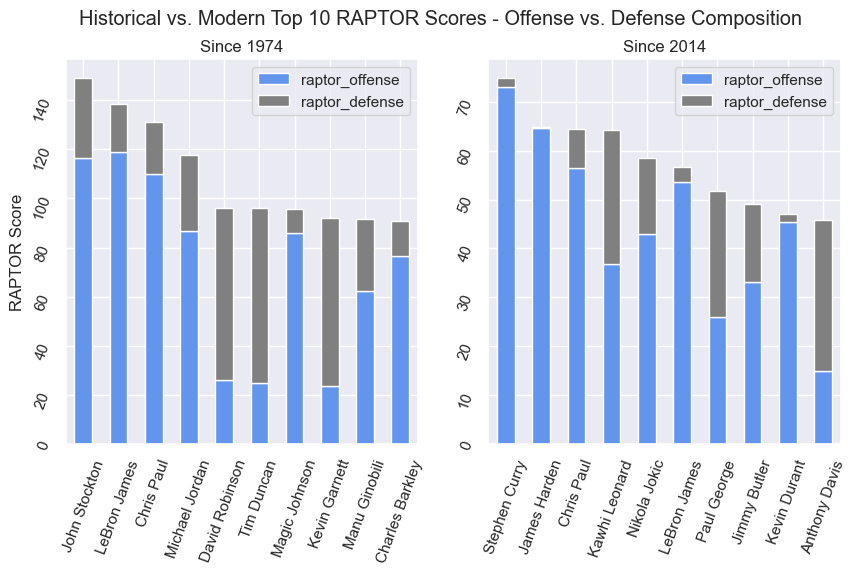

In [357]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False) #not comparing totals, just composition, so not worried about scale
fig.set_size_inches(10, 5, forward=True)# set graph size
plt.subplots_adjust(wspace=0.2) #create space for labels between graphs

historical_df.plot(ax=ax1, kind='bar', stacked=True, color=['cornflowerblue','grey'])
modern_df.plot(ax=ax2, kind='bar', stacked=True, color=['cornflowerblue','grey'])

fig.suptitle('Historical vs. Modern Top 10 RAPTOR Scores - Offense vs. Defense Composition') #set overall title
ax1.set_title('Since 1974')
ax2.set_title('Since 2014')
ax1.set_ylabel('RAPTOR Score')
ax1.set_xlabel(None)
ax2.set_xlabel(None)
ax1.tick_params(rotation=70)
ax2.tick_params(rotation=70)

plt.show()

This comparison indicates the value modern NBA players put on offense. Steph Curry, the leader since 2014 (by a solid margin) has all but a small percentage of his RAPTOR coming from his offensive abilities. In second, almost 100% of James Harden's score comes from his offense.
\
\
This fits with what you can see watching the NBA over the last 15 years. The value players like Steph bring with their 3-point ability has greatly changed the style of play. But this isn't where the story has to end. We still have big men like AD in the top 10, and a slightly more balanced player like Kawhi in the top 5. And a guy like Kawhi thrives in the NBA Playoffs. The competition gets tougher, the game gets more physical, and someone that plays in that style can make their mark when it matters the most. So it's not as simple as ranking these scores for a NBA general manager. It's about building a complete team that can compete for championships year in and year by both scoring and preventing the other team from scoring.
\
\
But it definitely doesn't hurt to have a guy like Steph Curry to help you with championships. Just ask the Warriors.